# 2.3 NETWORK ANALYSIS - Confronti con *modelli sintetici* 

In questa sezione si creano, oltre alla rete reale, altre quattrp reti sintetiche (**modelli sintetici**) con le stesse caratteristiche (n nodi e n edges della rete reale) in modo tale da poter fare confronti, riguardo alle seguenti caratteristiche:
1. [Informazioni di base](#info)
2. [Componenti connesse](#comps)
3. [Degree Distribution](#dd)
4. [Analisi dei path](#path)
5. [Analisi degli hubs](#hubs)
6. [Clustering Coefficient, densità](#cc)
7. [Centralità](#centralita)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import powerlaw
import seaborn as sns
import matplotlib.colors as mcolors
import pickle

from operator import itemgetter
from collections import Counter
warnings.filterwarnings('ignore')

%matplotlib inline 

### **Rete Reale**

In [2]:
df = pd.read_csv("../data_collection/data/df_grafo_pesato.csv", skipinitialspace=True, na_values='?', keep_default_na=True)   
del df['Unnamed: 0']
df

,source,id_source,target,id_target,weights
0,jwl2nd,4563241355,chanleycourttv,4730732546,1.000000
1,simplyslj,1518917881119059968,theemilydbaker,22594853,0.952055
2,jwl2nd,4563241355,courttv,1031946753510203392,0.924658
3,simplyslj,1518917881119059968,legalbytesmedia,1262475778631106560,0.914384
4,adrferg,1074757149748854792,courttv,1031946753510203392,0.633562
...,...,...,...,...,...
21708,intheone9,208950166,ThatUmbrella,901030183213445125,0.000000
21709,intheone9,208950166,dailymailuk,111556423,0.000000
21710,intheone9,208950166,elainebhoft,1380604861486665730,0.000000
21711,intheone9,208950166,girlsreallyrule,580312540,0.000000


Carico la rete reale (**g**) stabilendo la *source*, il *target* e l'attributo delle edges, nel nostro caso i pesi

In [4]:
g = nx.from_pandas_edgelist(df, source="source", target = "target", create_using=nx.MultiDiGraph())

g2 = nx.Graph(g)


In [5]:
nx.info(g) #multigrafo diretto

'MultiDiGraph with 18266 nodes and 21713 edges'

In [6]:
nx.info(g2) 

'Graph with 18266 nodes and 21697 edges'

In [7]:
#salvo la rete su Gephy
nx.write_gexf(g, "plots/RW_graph.gexf")

### Rete Random* (ER Graphs)


In [15]:
#creo una rete ER con n nodi = n nodi rete reale e probabilità di connessione tra i nodi (p) = 0.00011 e rete diretta
er = nx.erdos_renyi_graph(18246,  0.00015, directed = False, seed = 42) #num nodi, probabilita'

In [51]:
#salvo la rete su Gephy*
nx.write_gexf(er, "plots/ER_graph.gexf")

### Scale-Free Networks (BA Model)

In [17]:
ba = nx.barabasi_albert_graph(18246, 1, seed = 42)
#m = Numero di edges da collegare da un nuovo nodo ai nodi esistenti
#seed = indicatore del numero casuale

In [18]:
#salvo la rete su Gephy
nx.write_gexf(ba, "plots/BA_graph.gexf")

### Rete Watts-Strogatz (WS)

In [7]:
ws = nx.watts_strogatz_graph(18246, k=3, p=0) #regular lattice (p=0)

In [8]:
#salvo la rete su Gephy
nx.write_gexf(ws, "plots/WS_graph.gexf")

### Configuration model

Modello che genera la rete a partire dai suoi gradi/degree o dalla distribuzione dei gradi. Infatti, per creare questo tipo di modello mi baso sui gradi dei nodie  non sul numero di nodi come in quelli precedenti

In [9]:
sequence = [i[1] for i in g2.degree()]
cm = nx.configuration_model(sequence)

In [10]:
#salvo la rete su Gephy
nx.write_gexf(cm, "plots/cm_graph.gexf")

---

## INFORMAZIONI DI BASE  <a id="info"></a>

In [15]:
#funzione che stampa le informazioni di base delle reti (num nodi, edges, lmax ecc.)
def net_basic_info(g):
    nodes = g.number_of_nodes()
    edges = g.number_of_edges()
    directness = g.is_directed()
    self_loops = nx.number_of_selfloops(g)
    lMax = ((nodes) * (nodes - 1)) / 2
    AvgDegree = sum(dict(g.degree()).values())/float(len(g))

    print('- Numero Nodi:', nodes)
    print('- Numero Edges:', edges)
    print ("- Numero di self-loop: ", self_loops)
    print("- La rete e' diretta:",directness)
    print('- Numero massimo di collegamenti (L_max):', lMax)
    print('- Avarage Degree:', AvgDegree)


In [16]:
lista_reti = [g2, er, ba, ws, cm] 
nomi_reti = ["Real World (RETE REALE)", "Erdos-Renyi (ER)", "Barabasi Albert (BA)" , "Watts Strogats (WS)", "Configuration Model (CM)"]

In [17]:
print("INFORMAZIONI DI BASE DELLE 4 RETI")
for net, nomi in zip(lista_reti, nomi_reti):

    print("\n--------------------------------"f"\nModello: {nomi}\n--------------------------------")
    net_basic_info(net)


INFORMAZIONI DI BASE DELLE 4 RETI

--------------------------------
Modello: Real World (RETE REALE)
--------------------------------
- Numero Nodi: 18246
- Numero Edges: 21674
- Numero di self-loop:  40
- La rete e' diretta: False
- Numero massimo di collegamenti (L_max): 166449135.0
- Avarage Degree: 2.3757535898279074

--------------------------------
Modello: Erdos-Renyi (ER)
--------------------------------
- Numero Nodi: 18246
- Numero Edges: 24924
- Numero di self-loop:  0
- La rete e' diretta: False
- Numero massimo di collegamenti (L_max): 166449135.0
- Avarage Degree: 2.7319960539296284

--------------------------------
Modello: Barabasi Albert (BA)
--------------------------------
- Numero Nodi: 18246
- Numero Edges: 18245
- Numero di self-loop:  0
- La rete e' diretta: False
- Numero massimo di collegamenti (L_max): 166449135.0
- Avarage Degree: 1.9998903869341225

--------------------------------
Modello: Watts Strogats (WS)
--------------------------------
- Numero Nodi: 

*****

## DEGREE DISTRIBUTION <a id="dd"></a>

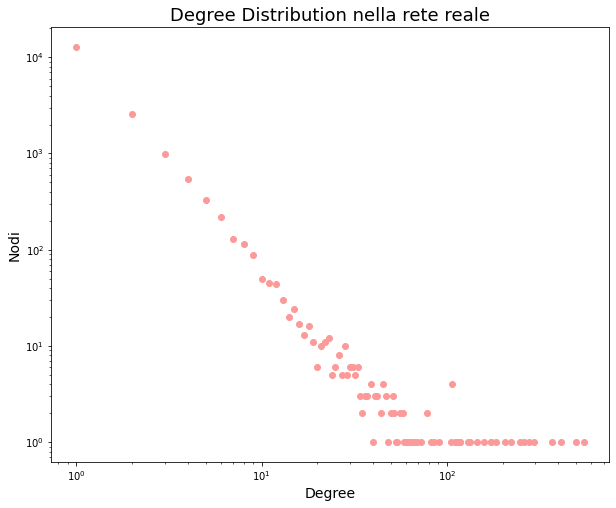

In [8]:
hist_g = nx.degree_histogram(g2)

fig = plt.figure(figsize=(10, 8)) 
plt.plot(range(0, len(hist_g)), hist_g,  "o", color = '#fb9a99')
plt.title("Degree Distribution nella rete reale", fontsize = 18)
plt.xlabel("Degree", fontsize = 14)
plt.ylabel("Nodi", fontsize = 14)
plt.loglog()
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_rete_reale.png')

plt.show()

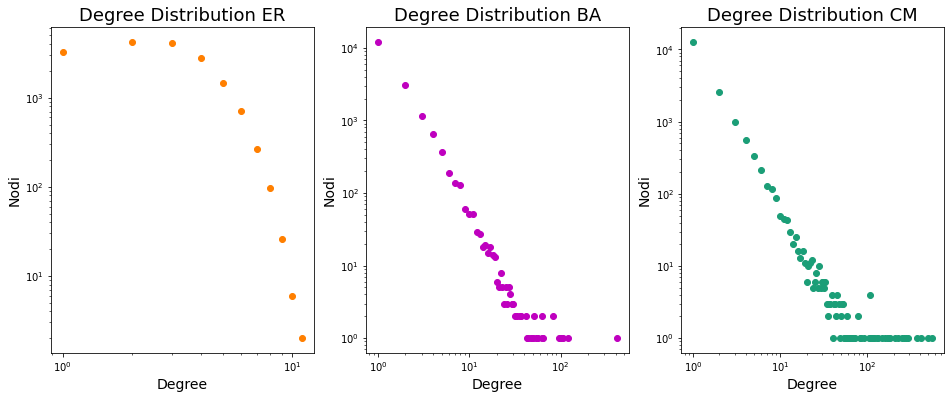

In [20]:
hist_g = nx.degree_histogram(g2)
hist_er = nx.degree_histogram(er)
hist_ba = nx.degree_histogram(ba)
#hist_ws = nx.degree_histogram(ws)
hist_cm = nx.degree_histogram(cm)

fig = plt.figure(figsize=(16, 6)) 


plt.subplot(1, 3, 1)
plt.plot(range(0, len(hist_er)), hist_er,  "o", color = '#ff7f00')
plt.title("Degree Distribution ER", fontsize = 18)
plt.xlabel("Degree", fontsize = 14)
plt.ylabel("Nodi", fontsize = 14)
plt.loglog()

plt.subplot(1, 3, 2)
plt.plot(range(0, len(hist_ba)), hist_ba, "o", color = 'm')
plt.title("Degree Distribution BA", fontsize = 18)
plt.xlabel("Degree", fontsize = 14)
plt.ylabel("Nodi", fontsize = 14)
plt.loglog()

plt.subplot(1, 3, 3)
plt.plot(range(0, len(hist_cm)), hist_cm, "o", color = '#1b9e77')
plt.title("Degree Distribution CM", fontsize = 18)
plt.xlabel("Degree", fontsize = 14)
plt.ylabel("Nodi", fontsize = 14)
plt.loglog()


plt.savefig('plots/confronti_modelli_sintetici/degree_dist_mod_sintetici_er_ba_cm.png')
plt.show()

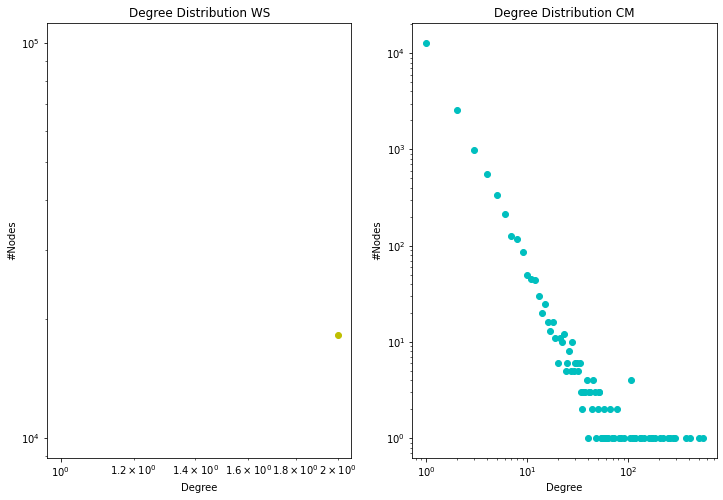

In [20]:

hist_ws = nx.degree_histogram(ws)
hist_cm = nx.degree_histogram(cm)
fig = plt.figure(figsize=(12, 8)) 
 


plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_ws)), hist_ws, "o", color = 'y')
plt.title("Degree Distribution WS")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()


plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist_cm)), hist_cm, "o", color = 'c')
plt.title("Degree Distribution CM")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.savefig('plots/confronti_modelli_sintetici/degree_dist_mod_sintetici_ws_cm.png')
plt.show()

**CCDF** (complementary cumulative distribution function/funzione di distribuzione cumulativa complementare): un metodo di calcolo statistico che misura la potenza nel tempo(?)


**CDF** (comulative distribuzion fraction) [https://en.wikipedia.org/wiki/Cumulative_distribution_function]

In [12]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'g.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.title('Degree Distibution', fontsize = 16)
    plt.xlabel('Degree', fontsize = 14)
    plt.ylabel('P(k)', fontsize = 14)


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.title("Comulative Degree Fraction", fontsize = 16)
    plt.xlabel("Degree", fontsize = 14)
    plt.ylabel('CDF', fontsize = 14)

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.power_law.plot_pdf(color='r',linestyle='--',label='fit ccdf')
    fit.plot_ccdf()
    plt.title("Complementary Comulative Degree Fraction", fontsize = 16)
    plt.ylabel('CCDF', fontsize = 14)
    plt.xlabel('Degree', fontsize = 14)
    plt.tight_layout()
    plt.show()
    print(f'alpha={fit.power_law.alpha+1} sigma={fit.power_law.sigma}')

Calculating best minimal value for power law fit


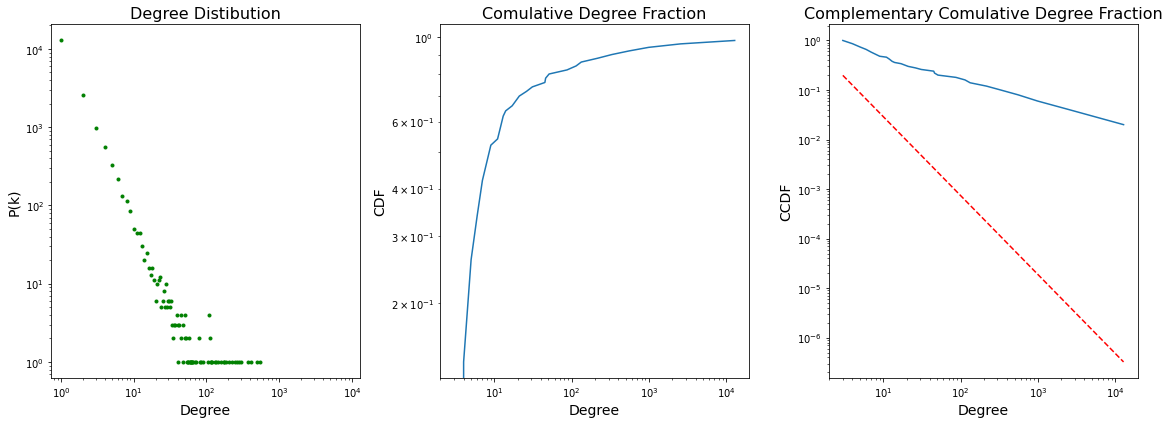

alpha=2.592842171616695 sigma=0.08384054394470486


<Figure size 432x288 with 0 Axes>

In [13]:
plot_dist(g2)
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_g.png')

Calculating best minimal value for power law fit


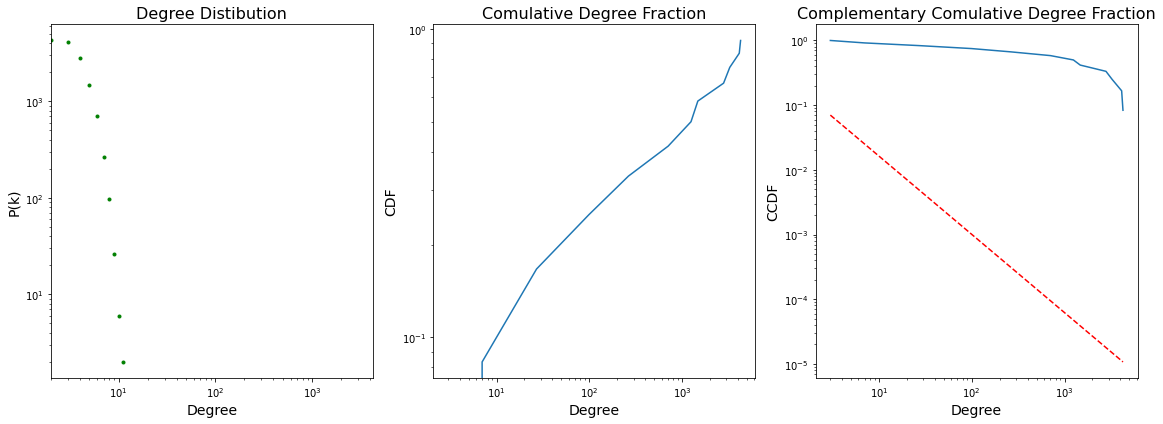

alpha=2.2104684373952077 sigma=0.060757004493021474


<Figure size 432x288 with 0 Axes>

In [23]:
plot_dist(er)
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_er.png')

Calculating best minimal value for power law fit


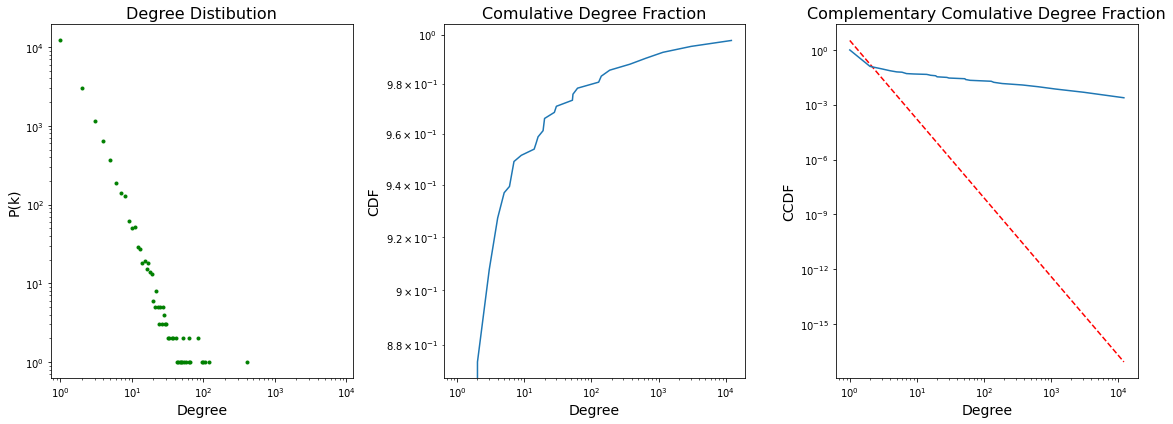

alpha=5.30514266650517 sigma=0.16283269189087732


<Figure size 432x288 with 0 Axes>

In [24]:
plot_dist(ba)
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_ba.png')

Calculating best minimal value for power law fit


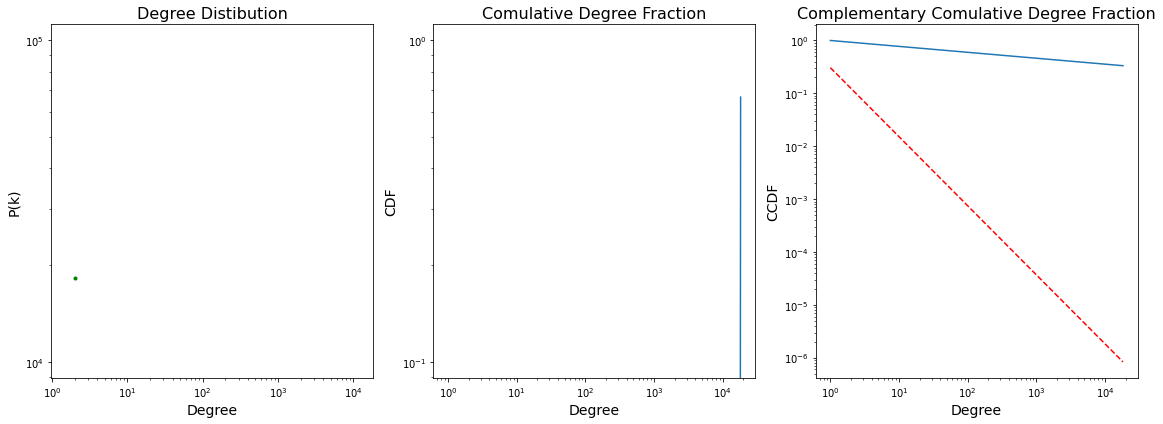

alpha=2.3057556681635907 sigma=0.17652811732050297


<Figure size 432x288 with 0 Axes>

In [25]:
plot_dist(ws)
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_ws.png')

Calculating best minimal value for power law fit


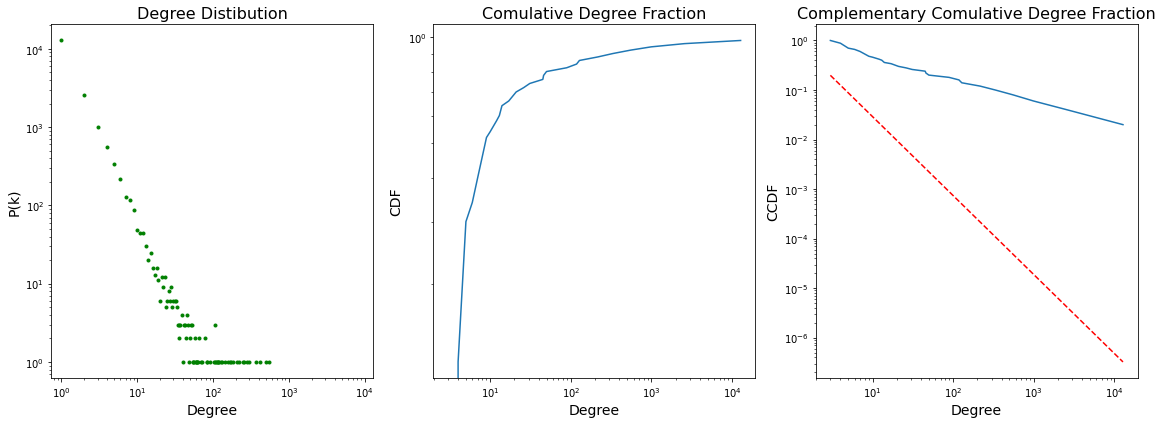

alpha=2.5935694790300046 sigma=0.08394340074549651


<Figure size 432x288 with 0 Axes>

In [26]:
plot_dist(cm)
plt.savefig('plots/confronti_modelli_sintetici/degree_dist_cm.png')

---

## CLUSTERING COEFF. E DENSITÀ <a id="cc"></a>

In [38]:
#trasformo g in grafo semplice per poter calcolare l'avg cluster coeff
g2 = nx.Graph(g)

In [39]:
cm2 = nx.Graph(cm)
nx.info(cm2)

'Graph with 18246 nodes and 21386 edges'

### RETE REALE

In [40]:
cc = nx.clustering(g2)
ordine_cc_g = [(k, v) for k, v in sorted(cc.items(), key=lambda item: -item[1])]
ordine_cc_g[0:10]

[('jacxpearl', 1.0),
 ('ihaveadream0101', 1.0),
 ('goblinqchesh', 1.0),
 ('KevinRashidi', 1.0),
 ('courttvfans', 1.0),
 ('robbloodysaul', 1.0),
 ('amypolacko', 1.0),
 ('ssolorio77', 1.0),
 ('chrisablesfool', 1.0),
 ('blaw', 1.0)]

In [41]:
triangoli = nx.triangles(g2)
ordine_triangoli_g = [(k, v) for k, v in sorted(triangoli.items(), key=lambda item: -item[1])]
ordine_triangoli_g[0:10]

[('deppheardtruth', 116),
 ('lawyerschiff', 60),
 ('courttv', 59),
 ('andysignore', 59),
 ('ianrunkle', 45),
 ('laurabockov', 42),
 ('thatbrianfella', 40),
 ('youtube', 35),
 ('chanleycourttv', 30),
 ('ashleycourttv', 29)]

### ER

In [42]:
cc_er = nx.clustering(er)
ordine_cc_er = [(k, v) for k, v in sorted(cc_er.items(), key=lambda item: -item[1])]
ordine_cc_er[0:10]

[(8205, 0.3333333333333333),
 (2245, 0.16666666666666666),
 (4188, 0.16666666666666666),
 (9421, 0.16666666666666666),
 (12996, 0.16666666666666666),
 (2503, 0.1),
 (11920, 0.1),
 (6953, 0.047619047619047616),
 (17372, 0.03571428571428571),
 (0, 0)]

In [43]:
triangoli_er = nx.triangles(ba)
ordine_triangoli_er = [(k, v) for k, v in sorted(triangoli_er.items(), key=lambda item: -item[1])]
ordine_triangoli_er[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

### BA

In [44]:
cc_ba = nx.clustering(ba)
ordine_cc_ba = [(k, v) for k, v in sorted(cc_ba.items(), key=lambda item: -item[1])]
ordine_cc_ba[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

In [45]:
triangoli_ba = nx.triangles(ba)
ordine_triangoli_ba = [(k, v) for k, v in sorted(triangoli_ba.items(), key=lambda item: -item[1])]
ordine_triangoli_ba[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

### WS

In [46]:
cc_ws = nx.clustering(ws)
ordine_cc_ws = [(k, v) for k, v in sorted(cc_ws.items(), key=lambda item: -item[1])]
ordine_cc_ws[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

In [47]:
triangoli_ws = nx.triangles(ws)
ordine_triangoli_ws= [(k, v) for k, v in sorted(triangoli_ws.items(), key=lambda item: -item[1])]
ordine_triangoli_ws[0:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 0),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 0)]

### CM

In [48]:
cc_cm = nx.clustering(cm2)
ordine_cc_cm = [(k, v) for k, v in sorted(cc_cm.items(), key=lambda item: -item[1])]
ordine_cc_cm[0:10]

[(167, 1.0),
 (497, 1.0),
 (600, 1.0),
 (1530, 1.0),
 (1649, 1.0),
 (1727, 1.0),
 (1930, 1.0),
 (2045, 1.0),
 (2286, 1.0),
 (2367, 1.0)]

In [49]:
triangoli_cm = nx.triangles(cm2)
ordine_triangoli_cm = [(k, v) for k, v in sorted(triangoli_cm.items(), key=lambda item: -item[1])]
ordine_triangoli_cm[0:10]

[(8, 621),
 (29, 601),
 (27, 437),
 (3, 381),
 (17, 354),
 (32, 251),
 (75, 247),
 (70, 234),
 (37, 219),
 (5, 195)]

In [50]:
print("----------------------------------\n CLUSTERING COFFICIENT E DENSITA \n----------------------------------\n")
print("RETE REALE")
print ("- Densita':", nx.density(g2),
       "\n - Average Clustering Coeff: ", nx.average_clustering(g2)) #passo all'avg clusteing g2, ossia il grafo semplice 
print("\nMODELLO ER")
print ("- Densita':", nx.density(er),
       "\n - Average Clustering Coeff: ", nx.average_clustering(er))
print("\nMODELLO BA")
print ("- Densita':", nx.density(ba),
       "\n - Average Clustering Coeff: ", nx.average_clustering(ba))
print("\nMODELLO WS")
print ("- Densita':", nx.density(ws),
       "\n- Average Clustering Coeff: ", nx.average_clustering(ws))
print("\n CONFIGURATION MODEL")
print ("- Densita':", nx.density(cm2),
       "\n- Average Clustering Coeff: ", nx.average_clustering(cm2))


----------------------------------
 CLUSTERING COFFICIENT E DENSITA 
----------------------------------

RETE REALE
- Densita': 0.0001301899225850588 
 - Average Clustering Coeff:  0.008794979537351949

MODELLO ER
- Densita': 0.00014973943841762832 
 - Average Clustering Coeff:  7.033505060469876e-05

MODELLO BA
- Densita': 0.00010961306587745259 
 - Average Clustering Coeff:  0.0

MODELLO WS
- Densita': 0.00010961907371882707 
- Average Clustering Coeff:  0.0

 CONFIGURATION MODEL
- Densita': 0.00012848369563470547 
- Average Clustering Coeff:  0.006839182897968738


***

## CONNECTED COMPONENTS  <a id = 'comps'> </a>

## Rete reale

In [27]:
comps_g = list(nx.connected_components(g2.to_undirected())) 
print ("- Componenti connesse RETE REALE:", len(comps_g))

big_comp_g = len(comps_g[0])
print ('- Componente maggiore:', big_comp_g)
#per calcolare le componenti connesse è necessario trasformare la rete  da diretta a indiretta

- Componenti connesse RETE REALE: 2408
- Componente maggiore: 11974


In [28]:
big_comp_g

11974

### ER

In [29]:
#componenti connesse
comps_er = list(nx.connected_components(er.to_undirected())) 

#giant component
big_comp_er = len(comps_er[0])

### BA 

In [30]:
#componenti connesse
comps_ba = list(nx.connected_components(ba.to_undirected())) 

#giant component
big_comp_ba = len(comps_ba[0])

### WS

In [31]:
#componenti
comps_ws = list(nx.connected_components(ws.to_undirected())) 

#giant component
big_comp_ws = len(comps_ws[0])

### **CM**

In [32]:
#componenti connesse
comps_cm = list(nx.connected_components(cm.to_undirected())) 
#print ("- Componenti connesse RETE REALE:", len(comps_cm))

#giant component
big_comp_cm = len(comps_cm[0])
#print ('- Componente maggiore:', big_comp_cm)

In [33]:
print("\n----------------------\n COMPONENTI CONNESSE \n-----------------------")
print("\nRETE REALE")
print ("- Componenti connesse:", len(comps_g))
print ("- Componente maggiore:", big_comp_g)

print("\nMODELLO ER")
print ("- Componenti connesse:", len(comps_er))
print ("- Componente maggiore:", big_comp_er)

print("\nMODELLO BA")
print ("- Componenti connesse:", len(comps_ba))
print ("- Componente maggiore:", big_comp_ba)

print("\nMODELLO WS")
print ("- Componenti connesse:", len(comps_ws))
print ("- Componente maggiore:", big_comp_ws)

print("\nCONFIGURATION MODEL")
print ("- Componenti connesse:", len(comps_cm))
print ("- Componente maggiore:", big_comp_cm)


----------------------
 COMPONENTI CONNESSE 
-----------------------

RETE REALE
- Componenti connesse: 2408
- Componente maggiore: 11974

MODELLO ER
- Componenti connesse: 1381
- Componente maggiore: 16711

MODELLO BA
- Componenti connesse: 1
- Componente maggiore: 18246

MODELLO WS
- Componenti connesse: 1
- Componente maggiore: 18246

CONFIGURATION MODEL
- Componenti connesse: 2167
- Componente maggiore: 13532


La rete con più componenti connesse è la rete random (ER)

### *Componenti debolmente e fortemente connesse* 

Prima però è necessario trasformare il grafo reale (g) e la rete random (er) in reti dirette


In [20]:
gd = g2.to_directed()

In [21]:
erd = er.to_directed()

In [22]:
cmd = cm.to_directed()

In [23]:
#componenti debolmente connesse
scc_g = nx.number_strongly_connected_components(gd)
scc_er = nx.number_strongly_connected_components(erd)
scc_cm = nx.number_strongly_connected_components(cmd)

In [24]:
#componenti debolmente connesse
wcc_g = nx.number_weakly_connected_components(gd)
wcc_er = nx.number_weakly_connected_components(erd)
wcc_cm = nx.number_weakly_connected_components(cmd)

In [25]:
print ("- Componenti FORTEMENTE CONNESSE rete reale:", scc_g)
print ("- Componenti FORTEMENTE CONNESSE modello random:", scc_er)
print ("- Componenti FORTEMENTE CONNESSE configuration model:", scc_cm)
print('-------------------------------------------------------')
print ("- Componenti DEBOLMENTE CONNESSE rete reale:", wcc_g)
print ("- Componenti DEBOLMENTE CONNESSE modello random:", wcc_er)
print ("- Componenti DEBOLMENTE CONNESSE configuration model:", wcc_cm)

- Componenti FORTEMENTE CONNESSE rete reale: 2408
- Componenti FORTEMENTE CONNESSE modello random: 1381
- Componenti FORTEMENTE CONNESSE configuration model: 2167
-------------------------------------------------------
- Componenti DEBOLMENTE CONNESSE rete reale: 2408
- Componenti DEBOLMENTE CONNESSE modello random: 1381
- Componenti DEBOLMENTE CONNESSE configuration model: 2167


## HUBS <a id = 'hubs'> </a>

In [64]:
def find_hubs(g, t_degree):
    hubs = []
    noHubs = []
    for i in g: #scorro i nodi in g
        if g.degree(i) >=  t_degree:
            hubs.append(i)
        else:
            noHubs.append(i)
        
    print("Numero di hubs nella rete: ", len(hubs))
    
    return hubs, noHubs


### RETE REALE

In [66]:
print('-----------\n RETE REALE\n-----------')
hubs, noHubs = find_hubs(g, 60)
print('\n')
for i in hubs:
    sorted(hubs)
    print('nodo: ',  i, '', ' | degree:', g.degree(i))


-----------
RETE REALE
-----------
Numero di hubs nella rete:  40


nodo:  theemilydbaker   | degree: 370
nodo:  courttv   | degree: 205
nodo:  legalbytesmedia   | degree: 183
nodo:  youtube   | degree: 498
nodo:  queenofcodebass   | degree: 66
nodo:  rekietalaw   | degree: 130
nodo:  thatumbrella   | degree: 294
nodo:  GellertDepp   | degree: 145
nodo:  TheEmilyDBaker   | degree: 107
nodo:  realamberheard   | degree: 413
nodo:  deppheardtruth   | degree: 548
nodo:  tmz   | degree: 247
nodo:  ThatUmbrella   | degree: 172
nodo:  kyduiguy   | degree: 223
nodo:  lawcrimenetwork   | degree: 91
nodo:  DrProudman   | degree: 107
nodo:  reenie62   | degree: 133
nodo:  KyDUIGuy   | degree: 85
nodo:  ianrunkle   | degree: 173
nodo:  mensurvivetoo   | degree: 69
nodo:  ThatBrianFella   | degree: 78
nodo:  robert__leonard   | degree: 278
nodo:  elonmusk   | degree: 261
nodo:  jamesfromcourt   | degree: 112
nodo:  thirdgirlll   | degree: 72
nodo:  voguemagazine   | degree: 115
nodo:  andysignore  

### ER

In [67]:
print('-----------\n RETE RANDOM\n-----------')
hubs, noHubs = find_hubs(er, 9) #in er il grado max è 9
print('\n')
for i in hubs:
    sorted(hubs)
    print('nodo: ', i, '', ' | degree: ', er.degree(i))


-----------
RETE RANDOM
-----------
Numero di hubs nella rete:  34


nodo:  1297   | degree:  10
nodo:  2071   | degree:  10
nodo:  2562   | degree:  9
nodo:  2585   | degree:  10
nodo:  2893   | degree:  9
nodo:  3042   | degree:  9
nodo:  3105   | degree:  9
nodo:  3899   | degree:  9
nodo:  4312   | degree:  10
nodo:  4330   | degree:  9
nodo:  5472   | degree:  9
nodo:  5536   | degree:  9
nodo:  5728   | degree:  9
nodo:  5957   | degree:  9
nodo:  6582   | degree:  9
nodo:  8442   | degree:  11
nodo:  9022   | degree:  9
nodo:  9280   | degree:  9
nodo:  9487   | degree:  9
nodo:  9524   | degree:  10
nodo:  10145   | degree:  9
nodo:  10886   | degree:  9
nodo:  13698   | degree:  9
nodo:  13780   | degree:  9
nodo:  13824   | degree:  9
nodo:  13956   | degree:  9
nodo:  14257   | degree:  9
nodo:  15138   | degree:  9
nodo:  15217   | degree:  9
nodo:  16027   | degree:  10
nodo:  16569   | degree:  9
nodo:  17122   | degree:  11
nodo:  17313   | degree:  9
nodo:  17581   | de

### BA

In [68]:
print('-----------\n RETE BA\n-----------')
hubs, noHubs = find_hubs(ba, 60)
print('\n')
for i in hubs:
    sorted(hubs)
    print('nodo: ', i, '', ' | degree: ', ba.degree(i))


-----------
RETE BA
-----------
Numero di hubs nella rete:  11


nodo:  0   | degree:  411
nodo:  2   | degree:  95
nodo:  3   | degree:  63
nodo:  7   | degree:  120
nodo:  9   | degree:  100
nodo:  19   | degree:  83
nodo:  21   | degree:  62
nodo:  22   | degree:  105
nodo:  34   | degree:  83
nodo:  55   | degree:  64
nodo:  88   | degree:  62


### WS

In [69]:
print('-----------\n RETE WS \n-----------')
hubs, noHubs = find_hubs(ws, 60) #in ws hanno tutti grado/degree = 2
print('\n')
for i in hubs:
    sorted(hubs)
    print('nodo', i, '', ' | degree:', ws.degree(i))


-----------
 RETE WS 
-----------
Numero di hubs nella rete:  0




### CM

In [71]:
print('-----------\n RETE WS \n-----------')
hubs, noHubs = find_hubs(cm, 60)
print('\n')
for i in hubs:
    sorted(hubs)
    print('nodo: ', i, '', ' | degree:', cm.degree(i))


-----------
 RETE WS 
-----------
Numero di hubs nella rete:  40


nodo:  3   | degree: 370
nodo:  4   | degree: 205
nodo:  5   | degree: 183
nodo:  8   | degree: 498
nodo:  13   | degree: 66
nodo:  16   | degree: 130
nodo:  17   | degree: 294
nodo:  19   | degree: 145
nodo:  21   | degree: 107
nodo:  27   | degree: 413
nodo:  29   | degree: 548
nodo:  32   | degree: 247
nodo:  34   | degree: 172
nodo:  37   | degree: 223
nodo:  40   | degree: 91
nodo:  45   | degree: 107
nodo:  54   | degree: 133
nodo:  58   | degree: 85
nodo:  59   | degree: 173
nodo:  60   | degree: 69
nodo:  65   | degree: 78
nodo:  70   | degree: 278
nodo:  75   | degree: 261
nodo:  76   | degree: 112
nodo:  82   | degree: 72
nodo:  87   | degree: 115
nodo:  102   | degree: 107
nodo:  114   | degree: 117
nodo:  124   | degree: 118
nodo:  144   | degree: 61
nodo:  148   | degree: 107
nodo:  157   | degree: 159
nodo:  180   | degree: 66
nodo:  196   | degree: 63
nodo:  315   | degree: 105
nodo:  331   | degree: 82
n

----

# Centralità <a id = 'centralita'> </a>

Per ciascun modello verranno calcolate le seguenti **misure di centralità** e ordinate in base all'importante (solitamente i 10 nodi con centralità maggiore)
1. [Degree Centrality](#dc)
2. [Closeness Centrality](#clc)
3. [Betweenness Centrality](#bc)
4. [Harmonic Centrality](#hc)
5. [Eigenvector Centrality](#ec) 
6. [Page Rank](#pr)


 ### Degree Centrality <a id="dc"></a>

Creo un dizionario con i gradi dei nodi del dizionario e stampo i 10 nodi con grado maggiore

#### Rete Reale

In [72]:
#Creo un dizionario con i gradi
degrees_g = dict(g2.degree())

In [73]:
ordine_gradi_g = [(k, v) for k, v in sorted(degrees_g.items(), key=lambda item: -item[1])]
ordine_gradi_g[0:10]

[('deppheardtruth', 547),
 ('youtube', 498),
 ('realamberheard', 413),
 ('theemilydbaker', 370),
 ('thatumbrella', 294),
 ('robert__leonard', 278),
 ('elonmusk', 261),
 ('tmz', 247),
 ('kyduiguy', 223),
 ('courttv', 205)]

#### ER

In [74]:
#Creo un dizionario con i gradi
degrees_er = dict(er.degree())

In [75]:
ordine_gradi_er = [(k, v) for k, v in sorted(degrees_er.items(), key=lambda item: -item[1])]
ordine_gradi_er[0:10]

[(8442, 11),
 (17122, 11),
 (1297, 10),
 (2071, 10),
 (2585, 10),
 (4312, 10),
 (9524, 10),
 (16027, 10),
 (2562, 9),
 (2893, 9)]

#### BA

In [76]:
#Creo un dizionario con i gradi
degrees_ba = dict(ba.degree())

In [77]:
ordine_gradi_ba = [(k, v) for k, v in sorted(degrees_ba.items(), key=lambda item: -item[1])]
ordine_gradi_ba[0:10]

[(0, 411),
 (7, 120),
 (22, 105),
 (9, 100),
 (2, 95),
 (19, 83),
 (34, 83),
 (55, 64),
 (3, 63),
 (21, 62)]

#### WS 

In [78]:
#Creo un dizionario con i gradi
degrees_ws = dict(ws.degree())

In [79]:
ordine_gradi_ws = [(k, v) for k, v in sorted(degrees_ws.items(), key=lambda item: -item[1])]
ordine_gradi_ws[0:10]

[(0, 2),
 (1, 2),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (8, 2),
 (9, 2)]

#### CM

In [80]:
#Creo un dizionario con i gradi
degrees_cm = dict(cm.degree())

In [81]:
ordine_gradi_cm = [(k, v) for k, v in sorted(degrees_cm.items(), key=lambda item: -item[1])]
ordine_gradi_cm[0:10]

[(29, 548),
 (8, 498),
 (27, 413),
 (3, 370),
 (17, 294),
 (70, 278),
 (75, 261),
 (32, 247),
 (37, 223),
 (4, 205)]

### Closeness Centrality  <a id="clc"></a>

#### Rete Reale

In [82]:
cc_g = nx.closeness_centrality(g2)

In [83]:
ordine_cc_g = [(k, v) for k, v in sorted(cc_g.items(), key=lambda item: -item[1])]
ordine_cc_g[0:10]

[('deppheardtruth', 0.2096847344352438),
 ('mensurvivetoo', 0.19311074013869345),
 ('thirdgirlll', 0.1929779364858902),
 ('theemilydbaker', 0.18855523599767265),
 ('realamberheard', 0.18843766030369866),
 ('elonmusk', 0.18627540739741633),
 ('bronk34', 0.18506881837293654),
 ('tmz', 0.18405436257637847),
 ('thatumbrella', 0.18366284908889713),
 ('ThatUmbrella', 0.1824600966983192)]

#### ER

In [84]:
cc_er = nx.closeness_centrality(er)

In [85]:
ordine_cc_er = [(k, v) for k, v in sorted(cc_er.items(), key=lambda item: -item[1])]
ordine_cc_er[0:10]

[(5906, 0.1183404622610562),
 (12958, 0.11729739946951916),
 (5657, 0.11717256914362058),
 (5536, 0.11711607882905355),
 (16569, 0.11675333267969097),
 (3201, 0.11650003502418108),
 (14106, 0.11648052790960035),
 (9330, 0.11645393782424455),
 (15138, 0.11625313229508581),
 (6582, 0.11597562595473306)]

#### BA

In [86]:
cc_ba = nx.closeness_centrality(ba)

In [87]:
ordine_cc_ba = [(k, v) for k, v in sorted(cc_ba.items(), key=lambda item: -item[1])]
ordine_cc_ba[0:10]

[(0, 0.19822256988581424),
 (2, 0.1974545730024567),
 (7, 0.1763705085696057),
 (18, 0.17214375347920027),
 (9, 0.17162234617953326),
 (1, 0.16939789239125388),
 (22, 0.1690870504063835),
 (3, 0.1671506967284454),
 (34, 0.1668816142103193),
 (6, 0.16665905457867092)]

#### WS

In [88]:
cc_ws = nx.closeness_centrality(ws)

In [89]:
ordine_cc_ws = [(k, v) for k, v in sorted(cc_ws.items(), key=lambda item: -item[1])]
ordine_cc_ws[0:10]

[(0, 0.00021921411673069414),
 (1, 0.00021921411673069414),
 (2, 0.00021921411673069414),
 (3, 0.00021921411673069414),
 (4, 0.00021921411673069414),
 (5, 0.00021921411673069414),
 (6, 0.00021921411673069414),
 (7, 0.00021921411673069414),
 (8, 0.00021921411673069414),
 (9, 0.00021921411673069414)]

#### CM

In [90]:
cc_cm = nx.closeness_centrality(cm)

In [91]:
ordine_cc_cm = [(k, v) for k, v in sorted(cc_cm.items(), key=lambda item: -item[1])]
ordine_cc_cm[0:10]

[(8, 0.2631358197796338),
 (29, 0.26227521283874633),
 (27, 0.25530338305783806),
 (3, 0.2516043722276247),
 (17, 0.2495293633646076),
 (75, 0.24481016118834412),
 (32, 0.24457342436001916),
 (70, 0.24193392701593264),
 (37, 0.24069414847339124),
 (5, 0.24013161467619956)]

### Betweenness Centrality <a id="bc"></a>

#### Rete Reale

In [92]:
bc_g = nx.closeness_centrality(g2)

In [93]:
ordine_bc_g = [(k, v) for k, v in sorted(bc_g.items(), key=lambda item: -item[1])]
ordine_bc_g[0:10]

[('deppheardtruth', 0.2096847344352438),
 ('mensurvivetoo', 0.19311074013869345),
 ('thirdgirlll', 0.1929779364858902),
 ('theemilydbaker', 0.18855523599767265),
 ('realamberheard', 0.18843766030369866),
 ('elonmusk', 0.18627540739741633),
 ('bronk34', 0.18506881837293654),
 ('tmz', 0.18405436257637847),
 ('thatumbrella', 0.18366284908889713),
 ('ThatUmbrella', 0.1824600966983192)]

#### ER

In [94]:
bc_er = nx.closeness_centrality(er)

In [95]:
ordine_bc_er = [(k, v) for k, v in sorted(bc_er.items(), key=lambda item: -item[1])]
ordine_bc_er[0:10]

[(5906, 0.1183404622610562),
 (12958, 0.11729739946951916),
 (5657, 0.11717256914362058),
 (5536, 0.11711607882905355),
 (16569, 0.11675333267969097),
 (3201, 0.11650003502418108),
 (14106, 0.11648052790960035),
 (9330, 0.11645393782424455),
 (15138, 0.11625313229508581),
 (6582, 0.11597562595473306)]

#### BA

In [96]:
bc_ba = nx.closeness_centrality(ba)

In [97]:
ordine_bc_ba = [(k, v) for k, v in sorted(bc_ba.items(), key=lambda item: -item[1])]
ordine_bc_ba[0:10]

[(0, 0.19822256988581424),
 (2, 0.1974545730024567),
 (7, 0.1763705085696057),
 (18, 0.17214375347920027),
 (9, 0.17162234617953326),
 (1, 0.16939789239125388),
 (22, 0.1690870504063835),
 (3, 0.1671506967284454),
 (34, 0.1668816142103193),
 (6, 0.16665905457867092)]

#### WS

In [98]:

bc_ws = nx.closeness_centrality(ws)

In [99]:
ordine_bc_ws = [(k, v) for k, v in sorted(bc_ws.items(), key=lambda item: -item[1])]
ordine_bc_ws[0:10]

[(0, 0.00021921411673069414),
 (1, 0.00021921411673069414),
 (2, 0.00021921411673069414),
 (3, 0.00021921411673069414),
 (4, 0.00021921411673069414),
 (5, 0.00021921411673069414),
 (6, 0.00021921411673069414),
 (7, 0.00021921411673069414),
 (8, 0.00021921411673069414),
 (9, 0.00021921411673069414)]

#### CM

In [100]:
bc_cm = nx.closeness_centrality(cm)

In [101]:
ordine_bc_cm = [(k, v) for k, v in sorted(bc_cm.items(), key=lambda item: -item[1])]
ordine_bc_cm[0:10]

[(8, 0.2631358197796338),
 (29, 0.26227521283874633),
 (27, 0.25530338305783806),
 (3, 0.2516043722276247),
 (17, 0.2495293633646076),
 (75, 0.24481016118834412),
 (32, 0.24457342436001916),
 (70, 0.24193392701593264),
 (37, 0.24069414847339124),
 (5, 0.24013161467619956)]

### Harmonic Centrality <a id="hc"></a>

#### Rete Reale

In [102]:
hc_g = nx.harmonic_centrality(g2)

In [103]:
ordine_hc_g = [(k, v) for k, v in sorted(hc_g.items(), key=lambda item: -item[1])]
ordine_hc_g[0:10]

[('deppheardtruth', 4502.378427128435),
 ('realamberheard', 3962.16125541145),
 ('mensurvivetoo', 3961.648665223809),
 ('thirdgirlll', 3943.8915223666595),
 ('theemilydbaker', 3913.617604617783),
 ('elonmusk', 3817.274458874605),
 ('thatumbrella', 3811.5579809081687),
 ('youtube', 3802.6631396382895),
 ('tmz', 3774.1949855701478),
 ('bronk34', 3765.644300144418)]

#### ER

In [104]:
hc_er = nx.harmonic_centrality(er)

In [105]:
ordine_hc_er = [(k, v) for k, v in sorted(hc_er.items(), key=lambda item: -item[1])]
ordine_hc_er[0:10]

[(5906, 2270.9076839826453),
 (5536, 2248.8822261071746),
 (5657, 2247.3643412142897),
 (12958, 2245.987617937563),
 (16569, 2242.868317793256),
 (3201, 2236.075391275329),
 (14106, 2234.400333000271),
 (9330, 2233.300224775159),
 (15138, 2228.0535950160133),
 (6582, 2225.9250638249905)]

#### BA

In [106]:
hc_ba = nx.harmonic_centrality(ba)

In [107]:
ordine_hc_ba = [(k, v) for k, v in sorted(hc_ba.items(), key=lambda item: -item[1])]
ordine_hc_ba[0:10]

[(0, 4441.933041957866),
 (2, 4203.598737373604),
 (7, 3727.325352425269),
 (18, 3641.6653901653667),
 (9, 3621.8872183371845),
 (1, 3557.2869630369564),
 (22, 3542.9605228104774),
 (34, 3522.1117105117287),
 (3, 3513.6627566877723),
 (28, 3484.3824175824375)]

#### WS

In [108]:
hc_ws = nx.harmonic_centrality(ws)

In [109]:
ordine_hc_ws = [(k, v) for k, v in sorted(hc_ws.items(), key=lambda item: -item[1])]
ordine_hc_ws[0:10]

[(5870, 19.391539280491607),
 (468, 19.391539280491603),
 (5688, 19.391539280491603),
 (5689, 19.391539280491603),
 (5692, 19.391539280491603),
 (5807, 19.391539280491603),
 (5808, 19.391539280491603),
 (5809, 19.391539280491603),
 (5810, 19.391539280491603),
 (5811, 19.391539280491603)]

#### CM

In [110]:
hc_cm = nx.harmonic_centrality(cm)

In [111]:
ordine_hc_cm = [(k, v) for k, v in sorted(hc_cm.items(), key=lambda item: -item[1])]
ordine_hc_cm[0:10]

[(8, 5354.917857142657),
 (29, 5354.6059523807435),
 (27, 5192.363095237921),
 (3, 5092.534523809404),
 (17, 5040.016666666551),
 (75, 4922.897619047544),
 (32, 4921.811904761843),
 (70, 4875.761904761865),
 (37, 4830.69999999999),
 (5, 4811.516666666653)]

## Eigenvector Centrality <a id="ec"></a>

#### Rete Reale

In [112]:
evc_g = nx.eigenvector_centrality(g2)

In [113]:
ordine_evc_g = [(k, v) for k, v in sorted(evc_g.items(), key=lambda item: -item[1])]
ordine_evc_g[0:10]

[('deppheardtruth', 0.43188299832441074),
 ('theemilydbaker', 0.25019176173511587),
 ('youtube', 0.1985930155116337),
 ('thatumbrella', 0.1902511012432535),
 ('ianrunkle', 0.163530656362908),
 ('kyduiguy', 0.15081706239863715),
 ('realamberheard', 0.14912463655989333),
 ('legalbytesmedia', 0.12830720551278485),
 ('lumberlaw', 0.11299442742195255),
 ('tmz', 0.09943237432632798)]

#### ER

In [115]:
evc_er = nx.eigenvector_centrality(er)

In [117]:
ordine_evc_er = [(k, v) for k, v in sorted(evc_er.items(), key=lambda item: -item[1])]
ordine_evc_er[0:10]

[(5536, 0.08805774026842605),
 (14106, 0.07653946135937614),
 (5657, 0.07569599265937464),
 (9330, 0.0721219468564091),
 (8442, 0.07200066923273214),
 (13956, 0.06979932611719492),
 (1297, 0.0662401122330572),
 (3201, 0.0627708041792322),
 (5906, 0.06235490370528696),
 (7426, 0.060863801122863485)]

#### BA

In [118]:
evc_ba = nx.eigenvector_centrality(ba)

In [119]:
ordine_evc_ba = [(k, v) for k, v in sorted(evc_ba.items(), key=lambda item: -item[1])]
ordine_evc_ba[0:10]

[(0, 0.7038442485984276),
 (2, 0.0450464676304717),
 (34, 0.04320427667330686),
 (3, 0.04074532726618537),
 (1, 0.039737706329584656),
 (18, 0.03932320799603539),
 (28, 0.037838759247354276),
 (5, 0.037240182260640776),
 (81, 0.037233525766609384),
 (1029, 0.03675412196650656)]

#### WS

In [120]:
evc_ws = nx.eigenvector_centrality(ws)

In [121]:
ordine_evc_ws = [(k, v) for k, v in sorted(evc_ws.items(), key=lambda item: -item[1])]
ordine_evc_ws[0:10]

[(0, 0.007403143449827078),
 (1, 0.007403143449827078),
 (2, 0.007403143449827078),
 (3, 0.007403143449827078),
 (4, 0.007403143449827078),
 (5, 0.007403143449827078),
 (6, 0.007403143449827078),
 (7, 0.007403143449827078),
 (8, 0.007403143449827078),
 (9, 0.007403143449827078)]

#### CM

In [122]:
evc_cm = nx.eigenvector_centrality(ws)

In [123]:
ordine_evc_cm = [(k, v) for k, v in sorted(evc_cm.items(), key=lambda item: -item[1])]
ordine_evc_cm[0:10]

[(0, 0.007403143449827078),
 (1, 0.007403143449827078),
 (2, 0.007403143449827078),
 (3, 0.007403143449827078),
 (4, 0.007403143449827078),
 (5, 0.007403143449827078),
 (6, 0.007403143449827078),
 (7, 0.007403143449827078),
 (8, 0.007403143449827078),
 (9, 0.007403143449827078)]

### Page Rank <a id="pr"></a>

#### Rete Reale

In [124]:
pr_g = nx.pagerank(g2)

In [125]:
ordine_pr_g = [(k, v) for k, v in sorted(pr_g.items(), key=lambda item: -item[1])]
ordine_pr_g[0:10]

[('deppheardtruth', 0.00920941282864928),
 ('youtube', 0.008809342869392682),
 ('realamberheard', 0.0070897680159504655),
 ('theemilydbaker', 0.00543920501947312),
 ('robert__leonard', 0.00505938789912642),
 ('elonmusk', 0.0044986794957387905),
 ('thatumbrella', 0.004034424022985996),
 ('tmz', 0.003791122035379082),
 ('courttv', 0.0030870369957633607),
 ('reenie62', 0.0030488794211405534)]

#### ER

In [126]:
pr_er = nx.pagerank(er)

In [127]:
ordine_pr_er = [(k, v) for k, v in sorted(pr_er.items(), key=lambda item: -item[1])]
ordine_pr_er[0:10]

[(17122, 0.00018850773381793966),
 (2071, 0.00018542650335876928),
 (9524, 0.0001833069596852005),
 (4312, 0.00018008317521487558),
 (8442, 0.00017414900204836226),
 (16027, 0.00016652107747362069),
 (1297, 0.00016256506807251262),
 (9487, 0.00016239040272894467),
 (13780, 0.0001601532533773386),
 (2585, 0.00015950354068803525)]

#### BA

In [128]:
pr_ba = nx.pagerank(ba)

In [129]:
ordine_pr_ba = [(k, v) for k, v in sorted(pr_ba.items(), key=lambda item: -item[1])]
ordine_pr_ba[0:10]

[(0, 0.009196608491912138),
 (7, 0.0026688122699454354),
 (22, 0.0023348774445059663),
 (9, 0.00220819840986664),
 (2, 0.0020909912001655967),
 (34, 0.0018985308617607474),
 (19, 0.0018564804071499233),
 (55, 0.0014637321117803013),
 (88, 0.001427758769958686),
 (3, 0.0014218583032527636)]

#### WS

In [130]:
pr_ws = nx.pagerank(ws)

In [131]:
ordine_pr_ws = [(k, v) for k, v in sorted(pr_ws.items(), key=lambda item: -item[1])]
ordine_pr_ws[0:10]

[(0, 5.4806532938726295e-05),
 (1, 5.4806532938726295e-05),
 (2, 5.4806532938726295e-05),
 (3, 5.4806532938726295e-05),
 (4, 5.4806532938726295e-05),
 (5, 5.4806532938726295e-05),
 (6, 5.4806532938726295e-05),
 (7, 5.4806532938726295e-05),
 (8, 5.4806532938726295e-05),
 (9, 5.4806532938726295e-05)]

#### CM

In [132]:
pr_cm = nx.pagerank(cm)

In [133]:
ordine_pr_cm = [(k, v) for k, v in sorted(pr_cm.items(), key=lambda item: -item[1])]
ordine_pr_cm[0:10]

[(29, 0.008658776328142086),
 (8, 0.007829374433293146),
 (27, 0.006677278331703454),
 (3, 0.0058794337518046375),
 (17, 0.004629502547663793),
 (70, 0.0043983006559877936),
 (75, 0.00397554646196181),
 (32, 0.003939687293587879),
 (37, 0.003493496809596339),
 (4, 0.0031814172092676156)]

******

## Path Analysis <a id = 'path'> </a>

Per ridurre i tempi di esecuzione, la **Path Analysis** verrà eseguita sulla *biggest component* di ciascuna rete 

In [36]:
print("Average shortest path (g):", nx.average_shortest_path_length(g2.subgraph(comps_g[0])))

Average shortest path (g): 5.35636363266043


In [37]:
print("Average shortest path (er):", nx.average_shortest_path_length(er.subgraph(comps_er[0])))

Average shortest path (er): 9.568076471343856


In [38]:
print("Average shortest path (ba):", nx.average_shortest_path_length(ba.subgraph(comps_ba[0])))

Average shortest path (ba): 9.394325185288587


In [34]:
print("Average shortest path (ws):", nx.average_shortest_path_length(ws.subgraph(comps_ws[0])))

Average shortest path (ws): 4561.750013702384


In [35]:
print("Average shortest path (cm):", nx.average_shortest_path_length(cm.subgraph(comps_cm[0])))

Average shortest path (cm): 4.833390543862963
